<a href="https://colab.research.google.com/github/maruthikelgire/My-Practices/blob/main/Hand_written_digit_recognition_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##  MNIST Digit Recognizer

In [ ]:
#  Import necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Load the MNIST dataset (comes preloaded with Keras)
# It has 60,000 training images and 10,000 testing images of handwritten digits (0 to 9)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#  Normalize the images to make training easier
# Pixel values are from 0 to 255, divide by 255 to bring them between 0 and 1

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#  Build the model using Sequential API
# We'll use 1 input layer, 1 hidden layer, and 1 output layer

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#  Compile the model
#  Define how the model learns (optimizer), how it measures error (loss), and what to track (metrics)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
# Train for 5 rounds (epochs) and validate on 10% of training data

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

NameError: name 'model' is not defined

In [ ]:
#  Test the model on test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\n✅ Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0930

✅ Test accuracy: 0.9761000275611877


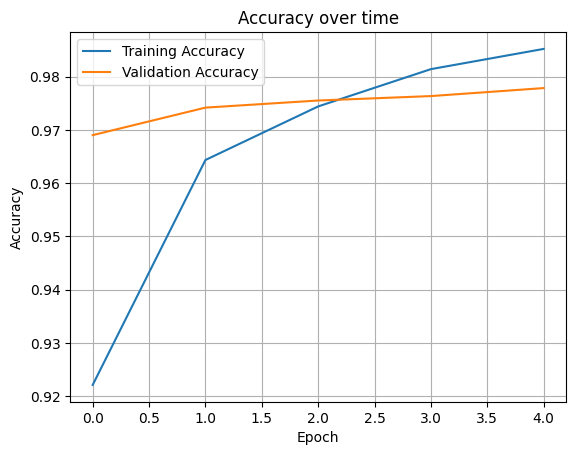

In [ ]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()

plt.show()

NameError: name 'plt' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


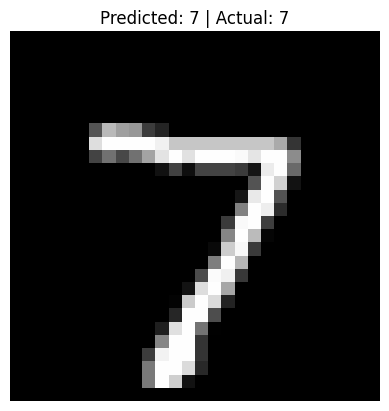

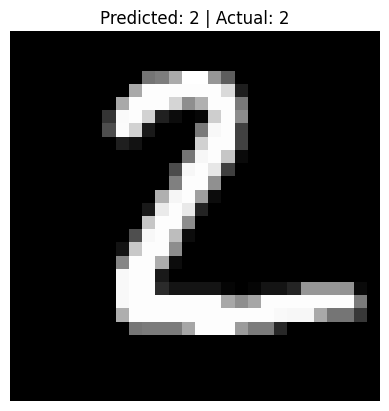

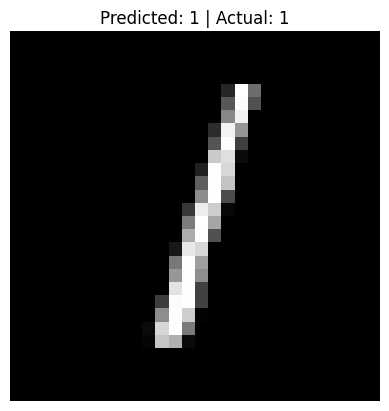

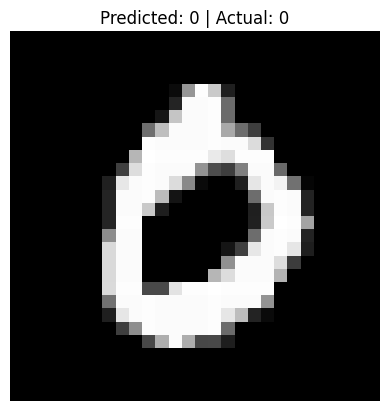

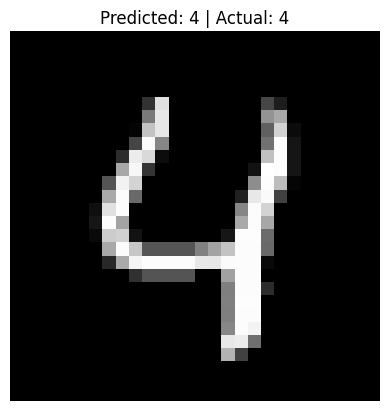

In [ ]:
# Step 10: Predict on test images and show first 5 predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  # Choose label with highest probability

# Step 11: Show first 5 test images with predicted and actual labels
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()